In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")  # Ignore all warnings

plt.rcParams.update({'font.family':'Candara', 'font.serif':['Candara']})
plt.rcParams.update({'pdf.fonttype': 'truetype', 'font.size': 18})

In [2]:
train = pd.read_csv('data/train.csv')

In [3]:
X = train.drop(['id','Age'],axis=1)
y = train['Age']

In [4]:
X.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
count,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000
mean,1.317460,1.024496,0.348089,23.385217,10.104270,5.058386,6.723870
std,0.287757,0.237396,0.092034,12.648153,5.618025,2.792729,3.584372
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.042524,0.042524
25%,1.150000,0.887500,0.300000,13.437663,5.712424,2.863300,3.968930
50%,1.375000,1.075000,0.362500,23.799405,9.908150,4.989512,6.931453
75%,1.537500,1.200000,0.412500,32.162508,14.033003,6.988152,9.071840
max,2.012815,1.612500,2.825000,80.101512,42.184056,21.545620,28.491248


In [5]:
num_cols = X.dtypes[X.dtypes != "object"].index
num_cols

Index(['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight'],
      dtype='object')

In [6]:
def get_skewness(df):
    skewed_cols = df[num_cols].apply(lambda x : skew(x)).sort_values(ascending=False)
    skewness = pd.DataFrame({'skew' : skewed_cols})
    return skewness

In [7]:
num_cols = X.dtypes[X.dtypes != "object"].index
num_cols

Index(['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight'],
      dtype='object')

In [8]:
skewness = get_skewness(X)
skewness

,skew
Shucked Weight,0.349465
Viscera Weight,0.286377
Shell Weight,0.277453
Weight,0.231460
Height,0.086576
Diameter,-0.812849
Length,-0.844360


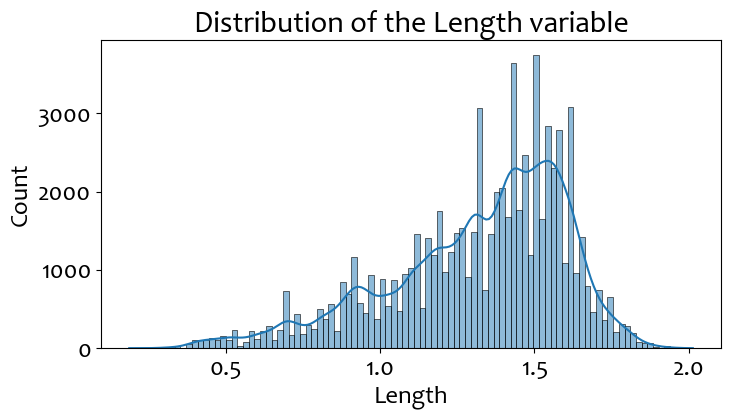

In [9]:
plt.figure(figsize=(8,4))
sns.histplot(train['Length'],kde=True)
plt.title('Distribution of the Length variable')
plt.show()

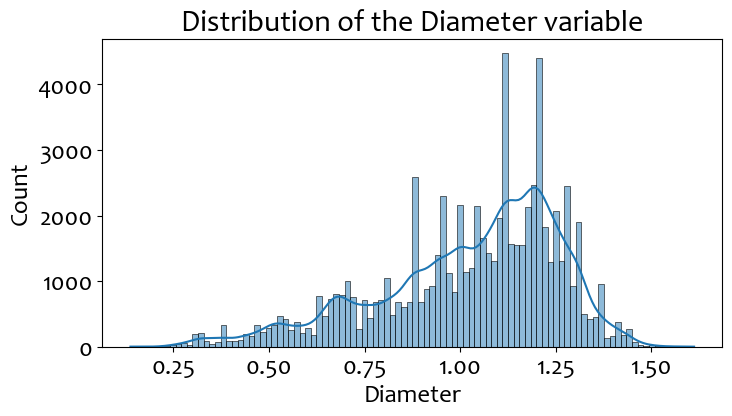

In [10]:
plt.figure(figsize=(8,4))
sns.histplot(train['Diameter'],kde=True)
plt.title('Distribution of the Diameter variable')
plt.show()

In [11]:
X = pd.get_dummies(X,drop_first=True)
X.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Sex_I,Sex_M
0,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,1,0
1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,1,0
2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,0,1
3,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,0,0
4,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,1,0


In [12]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)
X_train.shape,y_train.shape,X_val.shape,y_val.shape

((59240, 9), (59240,), (14811, 9), (14811,))

In [13]:
test = pd.read_csv('data/test.csv')

In [14]:
test.drop('id',axis=1,inplace=True)
test.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,I,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552
1,I,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930
2,F,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415
3,F,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676
4,I,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066


In [15]:
test = pd.get_dummies(test,drop_first=True)

In [16]:
model_0 = LinearRegression()
model_0.fit(X,y)

LinearRegression()

In [17]:
y_pred_0 = model_0.predict(X_val)
print("Mean absolute Error for a Simple Linear regression: " ,mean_absolute_error(y_val,np.round(y_pred_0)))

Mean absolute Error for a Simple Linear regression:  1.483627033961245


In [18]:
sample_submission_df = pd.read_csv('data/sample_submission.csv')
sample_submission_df['Age'] = np.round(model_0.predict(test))
sample_submission_df.to_csv('data/submission0.csv', index=False)
sample_submission_df.head()

,id,Age
0,74051,8.0
1,74052,8.0
2,74053,10.0
3,74054,10.0
4,74055,8.0


In [19]:
train.corr()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
id,1.000000,0.000165,0.000290,0.000967,-0.000910,-0.000801,-0.000640,-0.000816,0.000089
Length,0.000165,1.000000,0.989437,0.918352,0.936374,0.915516,0.917855,0.916957,0.612843
Diameter,0.000290,0.989437,1.000000,0.921353,0.938249,0.914199,0.918351,0.922688,0.621256
Height,0.000967,0.918352,0.921353,1.000000,0.901775,0.864083,0.883127,0.903398,0.638067
Weight,-0.000910,0.936374,0.938249,0.901775,1.000000,0.971267,0.971062,0.965525,0.601195
Shucked Weight,-0.000801,0.915516,0.914199,0.864083,0.971267,1.000000,0.942626,0.910398,0.503320
Viscera Weight,-0.000640,0.917855,0.918351,0.883127,0.971062,0.942626,1.000000,0.933919,0.576808
Shell Weight,-0.000816,0.916957,0.922688,0.903398,0.965525,0.910398,0.933919,1.000000,0.663473
Age,0.000089,0.612843,0.621256,0.638067,0.601195,0.503320,0.576808,0.663473,1.000000


In [20]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,Diameter,1021.10
0,Length,981.34
3,Weight,337.60
2,Height,110.97
4,Shucked Weight,94.78
6,Shell Weight,89.36
5,Viscera Weight,76.63
7,Sex_I,2.68
8,Sex_M,2.13


In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [22]:
pca = PCA()
pca.fit(X_train_scaled)

PCA()

In [23]:
pca.explained_variance_ratio_

array([0.79561569, 0.1156442 , 0.03992397, 0.02001825, 0.01243705,
       0.00839828, 0.00573698, 0.00115711, 0.00106846])

Text(0, 0.5, 'Cumulative Explained Variance')

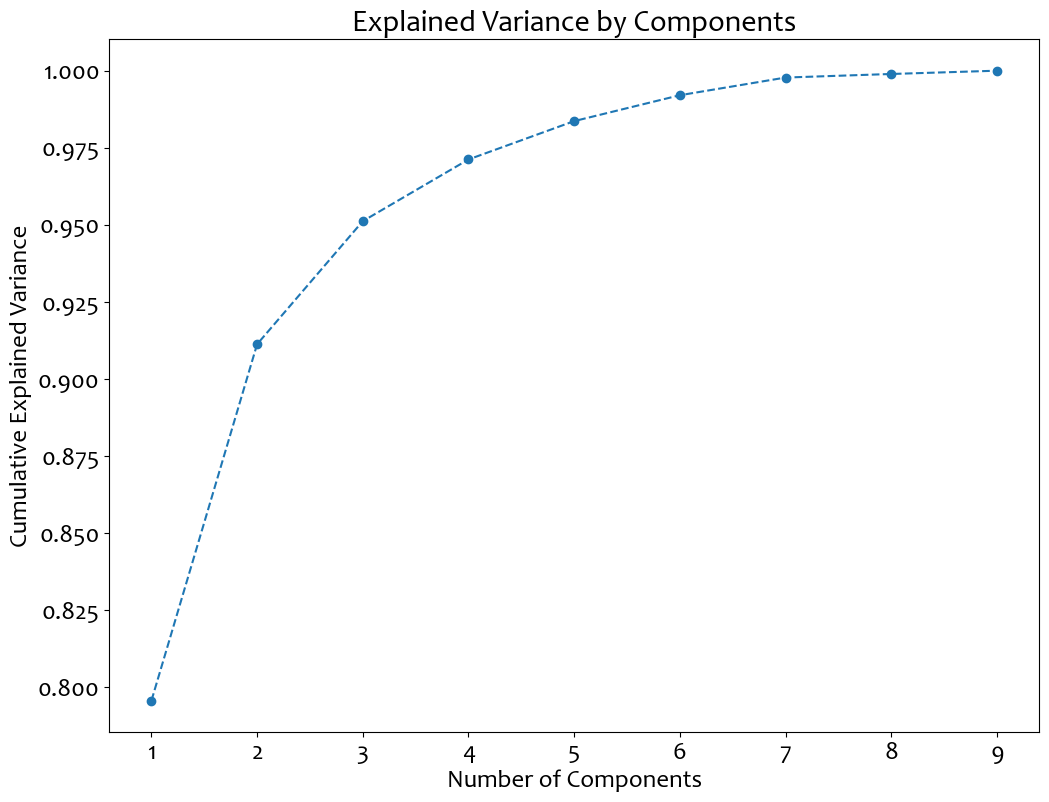

In [24]:
plt.figure(figsize = (12,9))
plt.plot(range(1,10), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [25]:
pca = PCA(n_components = 3)
pca.fit(X_train_scaled)

PCA(n_components=3)

In [26]:
pca.components_

array([[ 0.36199551,  0.36275955,  0.35032028,  0.36597856,  0.35643432,
         0.35983006,  0.35908775, -0.27372892,  0.14249746],
       [ 0.08487386,  0.08199479,  0.08079177,  0.10964644,  0.11193259,
         0.1045661 ,  0.10315527,  0.44227968, -0.8589577 ],
       [ 0.04092855,  0.0297885 ,  0.00937036,  0.09421124,  0.14214099,
         0.07846511,  0.05499525,  0.8474519 ,  0.49082981]])

In [27]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = X_train.columns.values,
                           index = ['Component 1', 'Component 2','Compoent 3'])
df_pca_comp

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Sex_I,Sex_M
Component 1,0.361996,0.362760,0.350320,0.365979,0.356434,0.359830,0.359088,-0.273729,0.142497
Component 2,0.084874,0.081995,0.080792,0.109646,0.111933,0.104566,0.103155,0.442280,-0.858958
Compoent 3,0.040929,0.029789,0.009370,0.094211,0.142141,0.078465,0.054995,0.847452,0.490830


([<matplotlib.axis.YTick at 0x21045405b90>,
 [Text(0, 0, 'Component 1'),
  Text(0, 1, 'Component 2'),
  Text(0, 2, 'Component 3')])

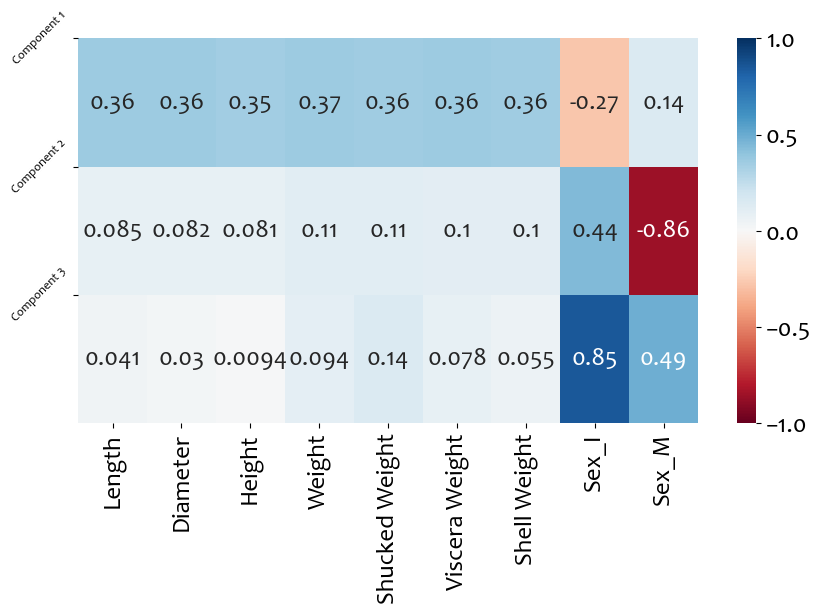

In [28]:
plt.figure(figsize=(10,5))
sns.heatmap(df_pca_comp,
            vmin = -1, 
            vmax = 1,
            cmap = 'RdBu',
            annot = True)
plt.yticks([0, 1, 2], 
           ['Component 1', 'Component 2', 'Component 3'],
           rotation = 45,
           fontsize = 9)

In [29]:
X_train_pca = pca.transform(X_train_scaled)

In [30]:
model_1 = LinearRegression()
model_1.fit(X_train_pca,y_train)

LinearRegression()

In [31]:
X_val_scaled = scaler.transform(X_val)
X_val_pca = pca.transform(X_val_scaled)

In [32]:
y_pred_1 = model_1.predict(X_val_pca)
print("Mean absolute Error for a Simple Linear regression: " ,mean_absolute_error(y_val,np.round(y_pred_1)))

Mean absolute Error for a Simple Linear regression:  1.7228411315913847


In [33]:
test_scaled = scaler.transform(test)
test_pca = pca.transform(test_scaled)

In [34]:
sample_submission_df = pd.read_csv('data/sample_submission.csv')
sample_submission_df['Age'] = np.round(model_1.predict(test_pca))
sample_submission_df.to_csv('data/submission1.csv', index=False)
sample_submission_df.head()

,id,Age
0,74051,7.0
1,74052,8.0
2,74053,10.0
3,74054,11.0
4,74055,8.0
